# Capstone Project : Automatic Ticket Assignment

## **Project Team : Meenakshi Awasthi, Deenadayalan, Geethika K, Bhasha Kapoor, Hemanth Kumar S N**

## Business Context:

One of the roles or responsibilities of  IT Functions is Incident Management. The main goal of Incident management is to provide fix, workaround or solutions that resolve the interruption and restore the service to its full capacity to ensure no business impact. Incidents are created by various business and IT users in an organization. IT Function has implemented Integrated monitoring systems and tools to monitor and assign the incidents accordingly to the right group/support individual to ensure fix/solution is provided to the end user (Employees of organization) within the expected SLA.


## Problem Statement:

Currently the incidents are created by various stakeholders (Business Users, IT Users and Monitoring Tools) within IT Service Management Tool and are assigned to Service Desk teams (L1 / L2 teams). This team will review the incidents for right ticket categorization, priorities and then carry out initial diagnosis to see if they can resolve. Around ~54% of the incidents are resolved by L1 / L2 teams. Incase L1 / L2 is unable to resolve, they will then escalate / assign the tickets to Functional teams from Applications and Infrastructure (L3 teams). Some portions of incidents are directly assigned to L3 teams by either Monitoring tools or Callers / Requestors. L3 teams will carry out detailed diagnosis and resolve the incidents. Around ~56% of incidents are resolved by Functional / L3 teams. Incase if vendor support is needed, they will reach out for their support towards incident closure


1) **25% - 30% of the incidents** needs to be reviewed for SOPs before ticket assignment which is manually intensive task

2) On an average **15 mins of  the time** is spent for each incident

3) **~1 FTE efforts** is needed to only focus on incident/ticket assignment to the right group 

4) **~ 54% of the incidents** are resolved by L1/L2 teams of the tickets 
assigned to them, **~xx amount of non value add time is spent to review and assign the wrongly assigned ticket**

5) **~56% of the incidents are resolved** by L3 teams of the tickets assigned to them by L1/L2 teams, **~xx amount of non value add time is spent to review and assign the wrongly assigned ticket**


6) 25% of the tickets are assigned to the wrong group/teams



## Value Story: 

By automating the ticket assignment to the right team/group using various automation techniques which suites better for the above problem statement will help in 

1) **Rightly assign the tickets** to the right group or team to reduce the wrong assigned 25% tickets  to ~0%(Ideal Situation or expected outcome)

2) **Reduce the queue time or wait time** of the ticket due to wrong assignment and **Improve the right first time from ~54% for L1/L2 team to ~xx% and from ~56% for L3 team to ~xx%**

3) Improve the **accuracy** of the ticket assigement

4) Reduce the **overall TAT** of the ticket for fix

5) Remove dependency on the **Manual work or FTE efforts and repurpose the FTE**


6) Reduce the **nonvalue added time spent by the L1/L2/L3 team** in checking and allocating the wrongly assignment incident ticket and spend on value added work



## Solution Proposal or Options :

Option1 : **Automate incident or ticket routing to the right team or group** ( AI/ML Techniques that can classify incidents to the right groups/teams

Option2 : **Automated IVR** based on the input received by user and allocate ticket to the right team

Option3 : **Virtual Chat Bot** which can interact with the user and can accordingly respond and allocate ticket or can also resolve issues like password reset, unlock user account, etc which can be systematically with less validations due to the security and roles-based issues/accesses


We are going to focus on **Option1 AIML Way for automatic incident classification and assignment** to the right teams/groups for solution and fix within the SLA


# Project Goal and Process Overview

## Goal is the develop or build a classifier that can classify the tickets or incidents accurately to the right team/group by understanding and analysing the text given in the dataset based on the past incidents raised.

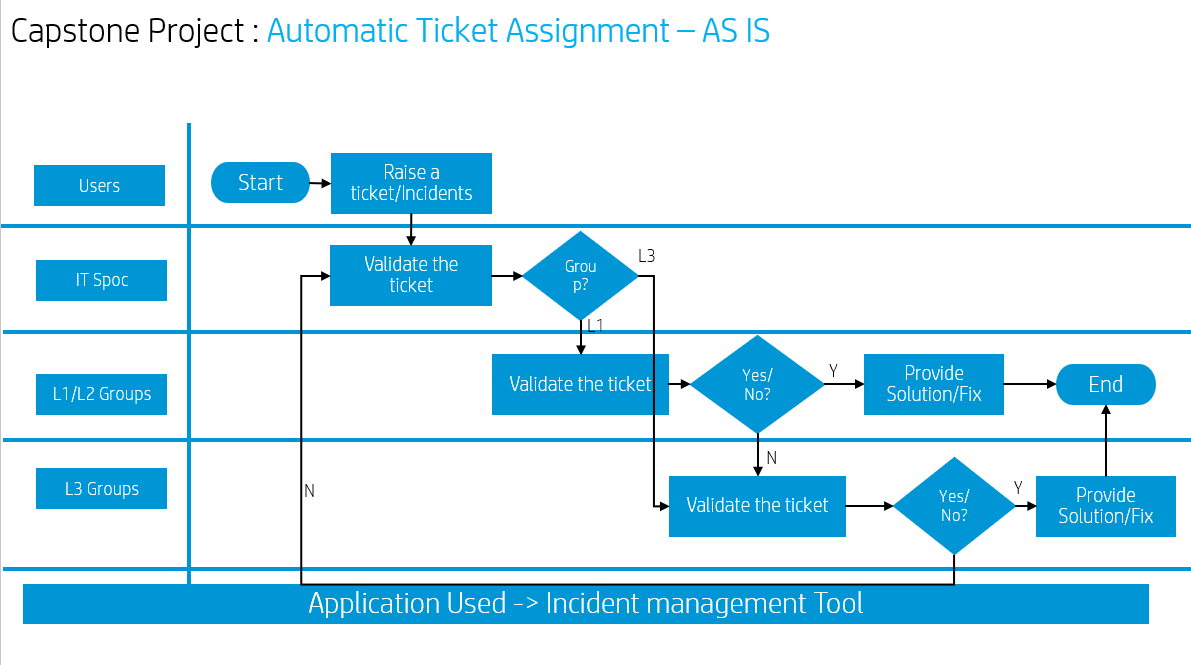

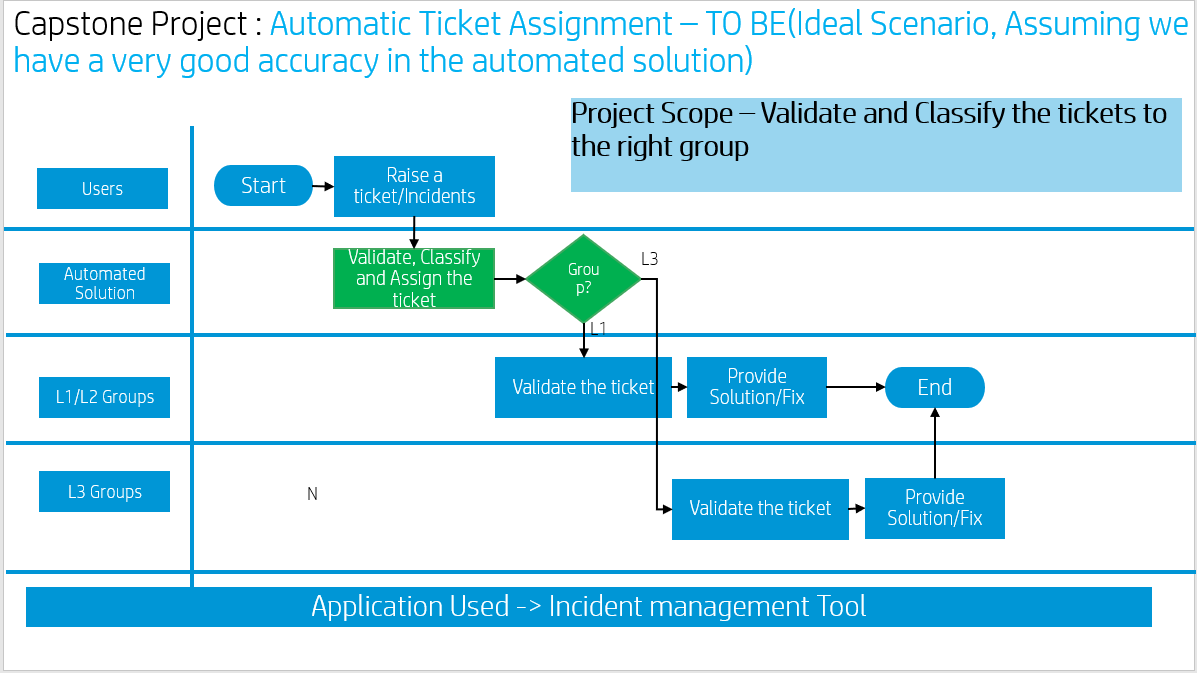

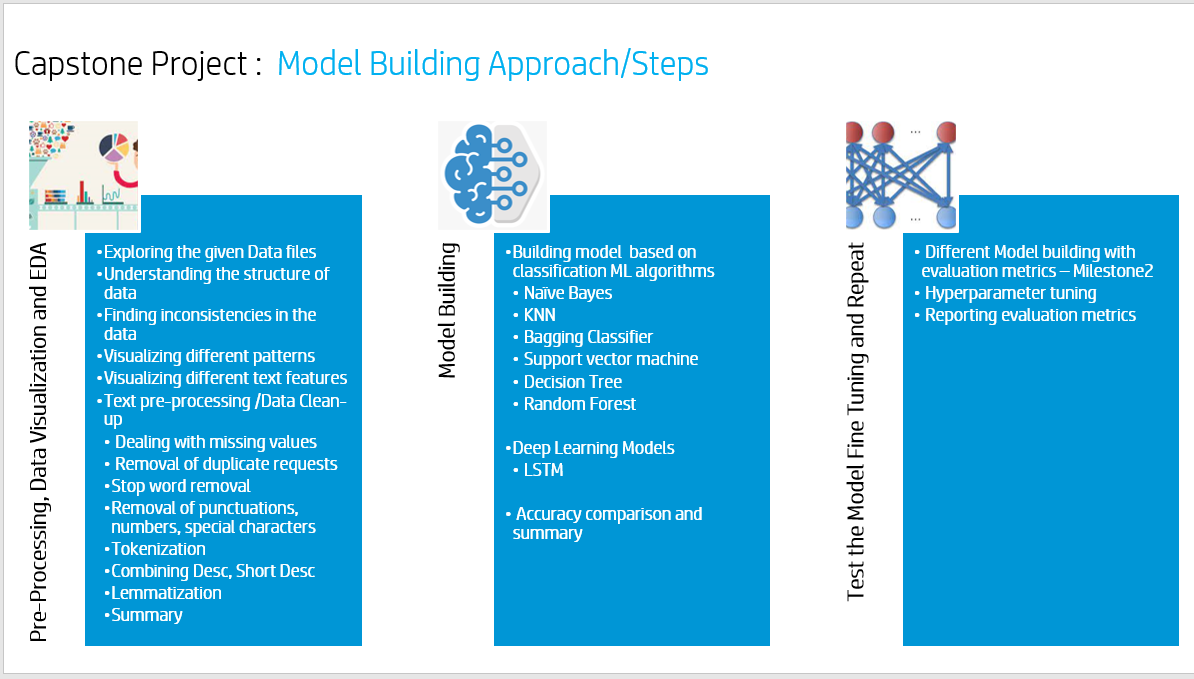

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np 
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
AtaData=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/CapstoneProjectFinal/input_data-1.xlsx')

# ** Exploratory Data Analysis, Summary and Inferences**

In [ ]:
# Understanding the data in the file
AtaData.head()

Short description  ... Assignment group
0                    login issue  ...            GRP_0
1                        outlook  ...            GRP_0
2             cant log in to vpn  ...            GRP_0
3  unable to access hr_tool page  ...            GRP_0
4                   skype error   ...            GRP_0

[5 rows x 4 columns]

In [ ]:
# understanding type of data
AtaData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


In [ ]:
# Understanding most frequented rows in the data

AtaData.describe()

Short description Description             Caller Assignment group
count               8492        8499               8500             8500
unique              7481        7817               2950               74
top       password reset         the  bpctwhsn kzqsbmtp            GRP_0
freq                  38          56                810             3976

In [ ]:
# Summarizing the data set for analysing and understanding
!pip install pandas-profiling

In [ ]:
import pandas_profiling
report = pandas_profiling.ProfileReport(AtaData)
report

Summarize dataset:   0%|          | 0/16 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#check for number of rows and columns
AtaData.shape

(8500, 4)

In [ ]:
# check for column names
AtaData.columns

Index(['Short description', 'Description', 'Caller', 'Assignment group'], dtype='object')

In [ ]:
# check for number of groups in the assigment group column, to analyze and understand what further analysis to be done on this column
AtaData['Assignment group'].nunique()

74

In [ ]:
# check for all the null values in the rows
AtaData[AtaData.isna().any(axis=1)]

Short description  ... Assignment group
2604                       NaN  ...           GRP_34
3383                       NaN  ...            GRP_0
3906                       NaN  ...            GRP_0
3910                       NaN  ...            GRP_0
3915                       NaN  ...            GRP_0
3921                       NaN  ...            GRP_0
3924                       NaN  ...            GRP_0
4341                       NaN  ...            GRP_0
4395  i am locked out of skype  ...            GRP_0

[9 rows x 4 columns]

In [ ]:
# check for any duplicate request created for the same caller with same short description and description
AtaData[AtaData.duplicated()]

Short description  ... Assignment group
51                           call for ecwtrjnq jpecxuty  ...            GRP_0
229                          call for ecwtrjnq jpecxuty  ...            GRP_0
493                     ticket update on inplant_872730  ...            GRP_0
512                                    blank call //gso  ...            GRP_0
667   job bkbackup_tool_powder_prod_full failed in j...  ...            GRP_8
...                                                 ...  ...              ...
7836             probleme mit erpgui \tmqfjard qzhgdoua  ...           GRP_24
8051               issue on pricing in distributor_tool  ...           GRP_21
8093  reset passwords for prgthyuulla ramdntythanjes...  ...           GRP_17
8347                           blank call // loud noise  ...            GRP_0
8405                           unable to launch outlook  ...            GRP_0

[83 rows x 4 columns]

In [ ]:
# Analyze further on the assigment group and its distribution of tickets
targetClassCnt=AtaData['Assignment group'].value_counts()
targetClassCnt.describe()

count      74.000000
mean      114.864865
std       465.747516
min         1.000000
25%         5.250000
50%        26.000000
75%        84.000000
max      3976.000000
Name: Assignment group, dtype: float64

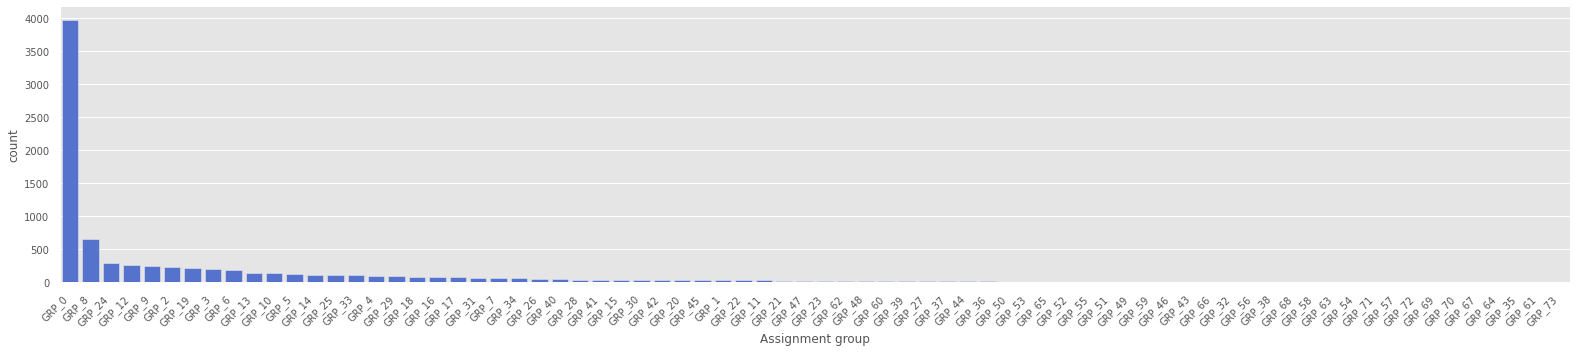

In [ ]:
# Plotting groups in a bar chart to understad the distribution of volumes

import seaborn as sns
import matplotlib.pyplot as plt
#add to remove warning for python 3.6 dependency
import warnings
import pandas.util.testing as tm
plt.style.use('ggplot')
%matplotlib inline

descending_order = AtaData['Assignment group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#added code for x label rotate 
ax=sns.countplot(x='Assignment group', data=AtaData, color='royalblue',order=descending_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Obervations and Inferences

* Data constains 8500 rows and 4 columns
* Group_0 has almost 50% of the records, **there is a class imbalance**
* Short description column contains 8 null values/missing values, 1 missing values in Description column
* There are 74 unique groups for whom the tickets are assigned in Assignment group column
* Password reset is the most frequent ticket raised and assigned to Group_0 - We can use a regular expression to assign this ticket directly to Group_0 rather than building a model as it is straigh forward
* There are top 3 callers who have raised most tickets - which can be looked at from a user experience matrics perspective 
* Eventhough Password issue of most frequented issue and has been assigned to Group_0 majorily, there are other groups who have received password issue like Goup_17, 19, 2, 21, 28, 12, 31, 34, 39, 43, 59
* Similar trend is there for email issue too
* Looking at the same issue assigned to various groups, it is good for multiclass classification
* We could have used regular expressions rule to pick up those issues which are assigned to specific groups and assign the ticket accordingly which will help in focusing on the those issue with mulitple classification for model building
* There are 83 duplicate rows which contains same description from same caller twice or more
* There is no significant relation between callers and tickets assigned so we can remove the caller column 
* From looking at the data manually, there are certain tickes and groups which follows a pattern and caller is always assigned to a specific group, having rules build based on regular experessions can take care of the issues. These smaller groups can be excluded from ML MOdel as the rules will run before ML Model - **Need to build the rule**
* There are certain tickets which is non english - Has to be translated before building ML model
* there are tickets in which spelling mistakes are present, spell correction has to be done before get the right insights out of it
*   Appears the Target class distrubtion is extremely skewed
*   Large no of entries for GRP_0 (mounting to 3976) which account for ~50% of the data
*   There are groups with 1 entry also. We could merge all groups with small entries to a group to reduce the imbalance in the target. This may reduce the imbalance to some extent.

**# Data Cleaning, Preprocessing and NLP**

---



In [ ]:
# Removing the Duplicates as there are scenarious where request is assigned to different groups and this might reduce the accuracy in classifying

AtaData = AtaData.drop_duplicates(['Short description', 'Description', 'Caller', 'Assignment group'])

In [ ]:
# cross check for any duplicates 
AtaData[AtaData.duplicated()]

Empty DataFrame
Columns: [Short description, Description, Caller, Assignment group]
Index: []

In [ ]:
# Removing the caller column as this is not going to provide any inferences

callers = AtaData['Caller'].unique()
AtaData.drop(columns='Caller',inplace=True)
AtaData.head()

Short description  ... Assignment group
0                    login issue  ...            GRP_0
1                        outlook  ...            GRP_0
2             cant log in to vpn  ...            GRP_0
3  unable to access hr_tool page  ...            GRP_0
4                   skype error   ...            GRP_0

[5 rows x 3 columns]

In [ ]:
# convert Description column data to lowercase

AtaData['Description'] = AtaData['Description'].str.lower()

print(AtaData['Description'])

0       -verified user details.(employee# & manager na...
1       \r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...
2       \r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...
3                           unable to access hr_tool page
4                                            skype error 
                              ...                        
8495    \r\n\r\nreceived from: avglmrts.vhqmtiua@gmail...
8496                             telephony_software issue
8497    vip2: windows password reset for tifpdchb pedx...
8498    i am unable to access the machine utilities to...
8499    an mehreren pc`s lassen sich verschiedene prgr...
Name: Description, Length: 8417, dtype: object


In [ ]:
# Define a function to clean the data
import re
import sys
from dateutil import parser
def is_valid_date(date_str):
    try:
        parser.parse(date_str)
        return True
    except:
        return False
        
def clean_data(text):
    text = text.lower()
    text = ' '.join([w for w in text.split() if not is_valid_date(w)])
    text = re.sub(r"received from:",' ',text)
    text = re.sub(r"from:",' ',text)
    text = re.sub(r"to:",' ',text)
    text = re.sub(r"subject:",' ',text)
    text = re.sub(r"sent:",' ',text)
    text = re.sub(r"ic:",' ',text)
    text = re.sub(r"cc:",' ',text)
    text = re.sub(r"bcc:",' ',text)
    #Remove email 
    text = re.sub(r'\S*@\S*\s?', '', text)
    # Remove numbers 
    text = re.sub(r'\d+','' ,text)
    # Remove new line characters 
    text = re.sub(r'\n',' ',text)
    # Remove hashtag while keeping hashtag text
    text = re.sub(r'#','', text)
    text = re.sub(r'&;?', 'and',text)
    # Remove HTML special entities (e.g. &amp;)
    text = re.sub(r'\&\w*;', '', text)
    # Remove hyperlinks
    text = re.sub(r'https?:\/\/.*\/\w*', '', text)  
    # Remove characters beyond Readable formart by Unicode:
    text= ''.join(c for c in text if c <= '\uFFFF') 
    text = text.strip()
    # Remove unreadable characters  (also extra spaces)
    text = ' '.join(re.sub("[^\u0030-\u0039\u0041-\u005a\u0061-\u007a]", " ", text).split())
    for name in callers:
      namelist = [part for part in name.split()]
      for namepart in namelist: 
          text = text.replace(namepart,'')
          
    text = re.sub(r"\s+[a-zA-Z]\s+", ' ', text)
    text = re.sub(' +', ' ', text)
    text = text.strip()
    return text

In [ ]:
# Apply the cleaning function to entire dataset
AtaData = AtaData.astype(str)
AtaData['Description'] = AtaData['Description'].apply(clean_data)

# Verify the data
AtaData.head(10)

Short description  ... Assignment group
0                                        login issue  ...            GRP_0
1                                            outlook  ...            GRP_0
2                                 cant log in to vpn  ...            GRP_0
3                      unable to access hr_tool page  ...            GRP_0
4                                       skype error   ...            GRP_0
5     unable to log in to engineering tool and skype  ...            GRP_0
6  event: critical:HostName_221.company.com the v...  ...            GRP_1
7  ticket_no1550391- employment status - new non-...  ...            GRP_0
8               unable to disable add ins on outlook  ...            GRP_0
9                    ticket update on inplant_874773  ...            GRP_0

[10 rows x 3 columns]

In [ ]:
# As there are 74 unique groups in the grouping the low frequency tickets will help to represent the data better (will do the grouping later after dropping the groups for which tickets can be assigned directly by creating rules)

Ticket = pd.DataFrame(AtaData['Assignment group'].value_counts())
Ticket = Ticket.T
Ticket

GRP_0  GRP_8  GRP_24  GRP_12  ...  GRP_70  GRP_67  GRP_64  GRP_73
Assignment group   3934    645     285     257  ...       1       1       1       1

[1 rows x 74 columns]

In [ ]:
# Merge Short description and Description
AtaData['Description'] = AtaData['Short description'] + ' '+ AtaData['Description']
AtaData.drop(columns=['Short description'],inplace=True)
AtaData.head()

Description Assignment group
0  login issue verified user details employee and...            GRP_0
1  outlook hello team my meetings skype meetings ...            GRP_0
2    cant log in to vpn hi cannot log on to vpn best            GRP_0
3  unable to access hr_tool page unable to access...            GRP_0
4                           skype error  skype error            GRP_0

# **Observations :** 

* Converted the text to lower case
* removed email addresses from the desctiption columns as it will not add any value for classification
* numeric values removed which might be a problem while preparing model for classification
* All puctuations are removed
* all the spaces have been replaced with single blank spaces

In [ ]:
#word cloud before performing NLP - Stop word removal, Steamma and Lematization, Tokenization
import nltk
from wordcloud import WordCloud, STOPWORDS
def generate_word_clod(corpus,x):
    wordcloud = WordCloud(width = 300, height = 300, 
                    background_color ='black', 
                    stopwords=STOPWORDS,
                    min_font_size = 10).generate(corpus)

    # plot the WordCloud image                        
    plt.figure(figsize = (12, 12), facecolor = None) 
    plt.imshow(wordcloud, interpolation="bilinear") 
    plt.axis("off")
    plt.title("Most common words of {}".format(x)) 
    plt.tight_layout(pad = 0) 
    plt.show()

In [ ]:
value = AtaData['Assignment group'].value_counts().sort_values(ascending=False).index
value

Index(['GRP_0', 'GRP_8', 'GRP_24', 'GRP_12', 'GRP_9', 'GRP_2', 'GRP_19',
       'GRP_3', 'GRP_6', 'GRP_13', 'GRP_10', 'GRP_5', 'GRP_14', 'GRP_25',
       'GRP_33', 'GRP_4', 'GRP_29', 'GRP_18', 'GRP_16', 'GRP_31', 'GRP_17',
       'GRP_7', 'GRP_34', 'GRP_26', 'GRP_40', 'GRP_28', 'GRP_41', 'GRP_30',
       'GRP_15', 'GRP_42', 'GRP_20', 'GRP_45', 'GRP_1', 'GRP_22', 'GRP_11',
       'GRP_21', 'GRP_47', 'GRP_23', 'GRP_62', 'GRP_48', 'GRP_39', 'GRP_27',
       'GRP_37', 'GRP_60', 'GRP_44', 'GRP_36', 'GRP_50', 'GRP_53', 'GRP_65',
       'GRP_52', 'GRP_55', 'GRP_51', 'GRP_49', 'GRP_59', 'GRP_46', 'GRP_43',
       'GRP_66', 'GRP_32', 'GRP_56', 'GRP_38', 'GRP_68', 'GRP_58', 'GRP_63',
       'GRP_54', 'GRP_71', 'GRP_57', 'GRP_72', 'GRP_69', 'GRP_70', 'GRP_67',
       'GRP_64', 'GRP_35', 'GRP_61', 'GRP_73'],
      dtype='object')

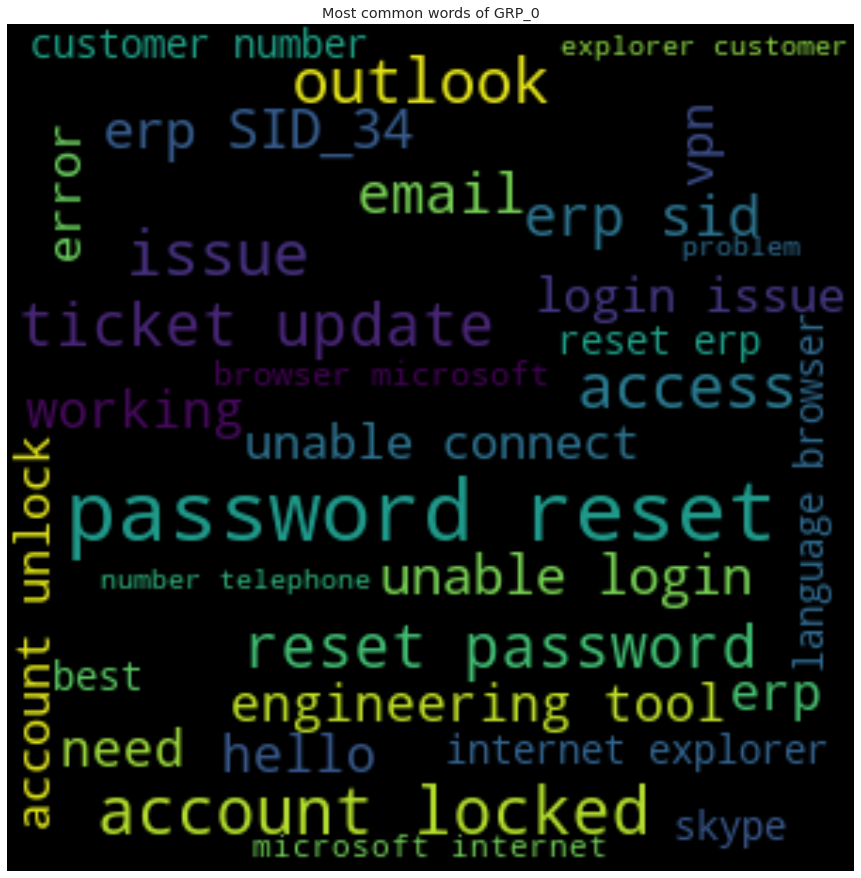

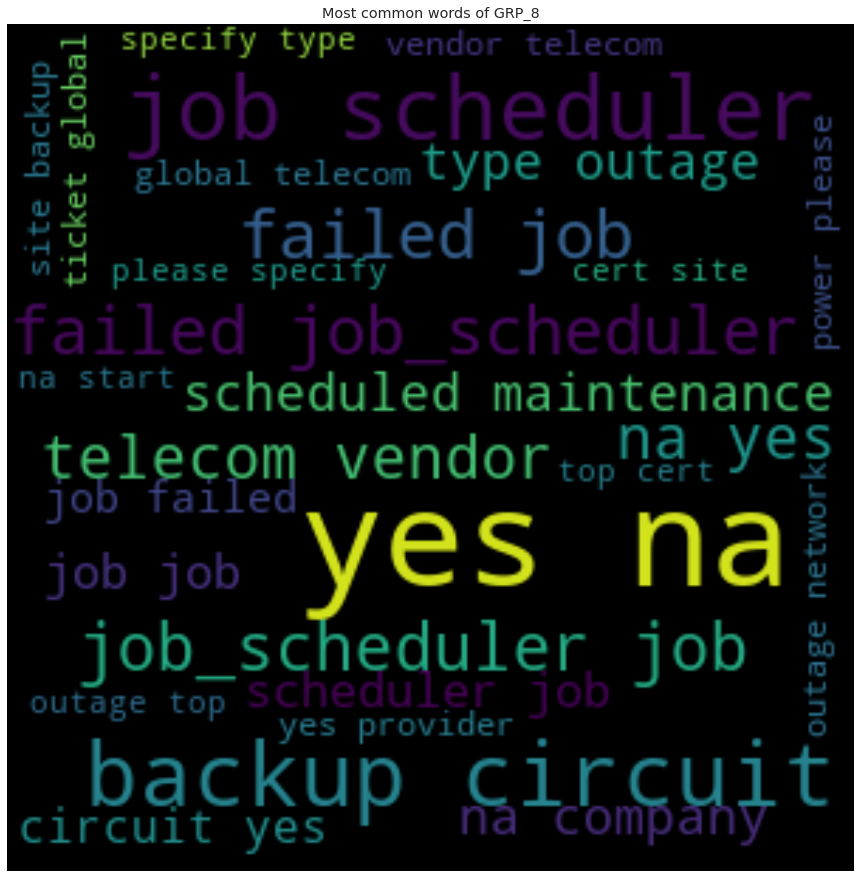

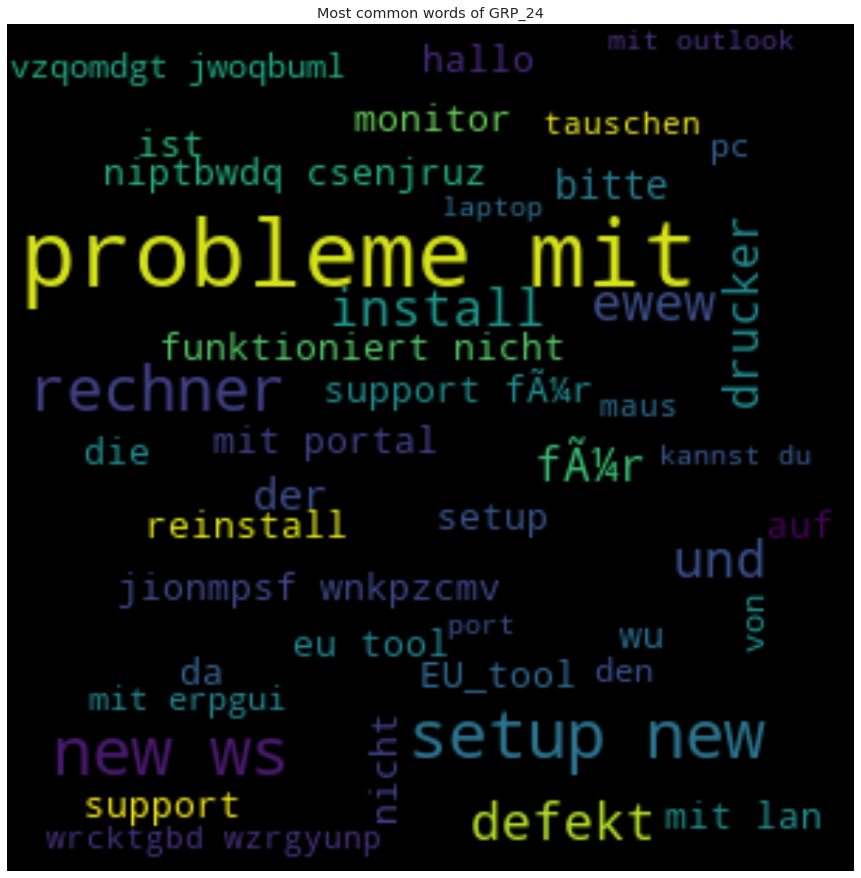

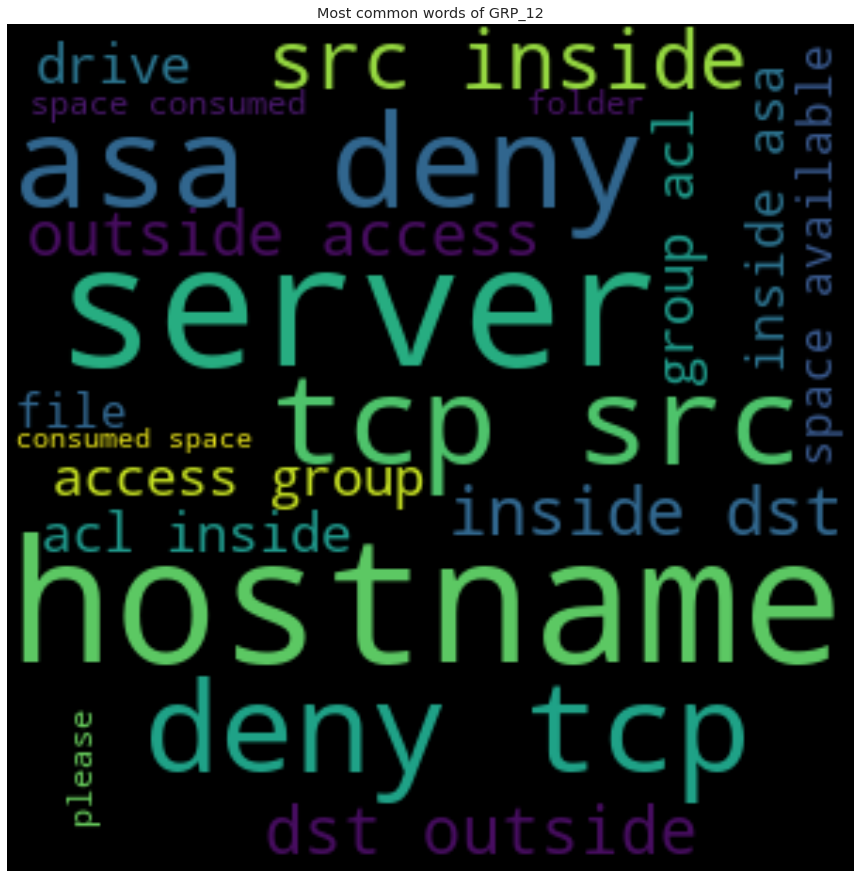

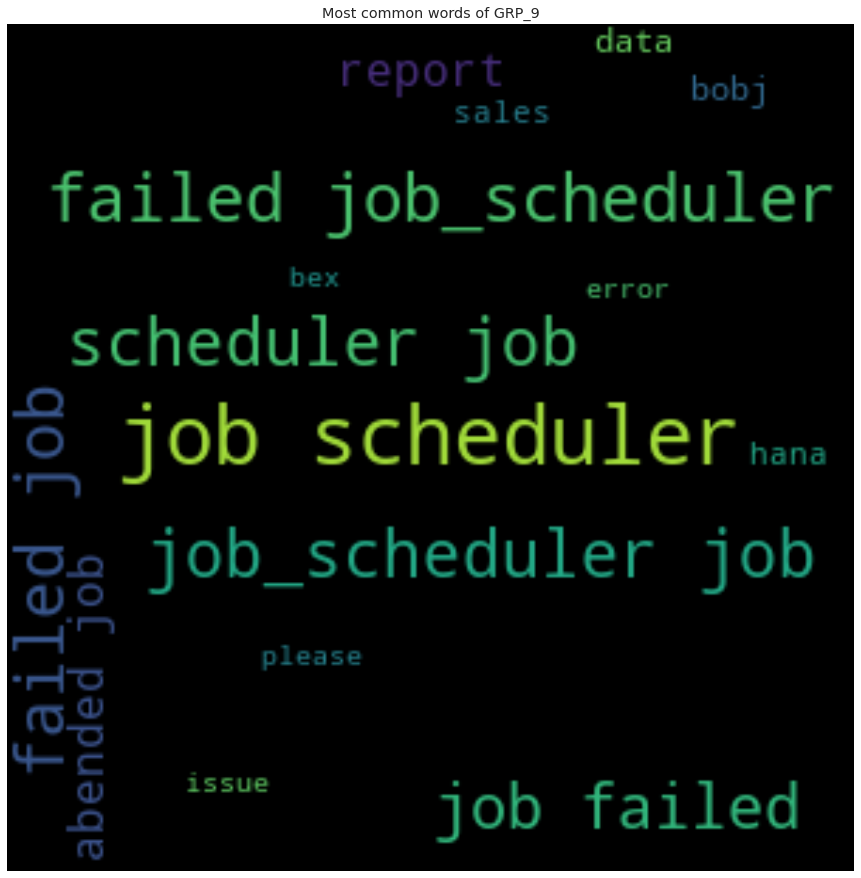

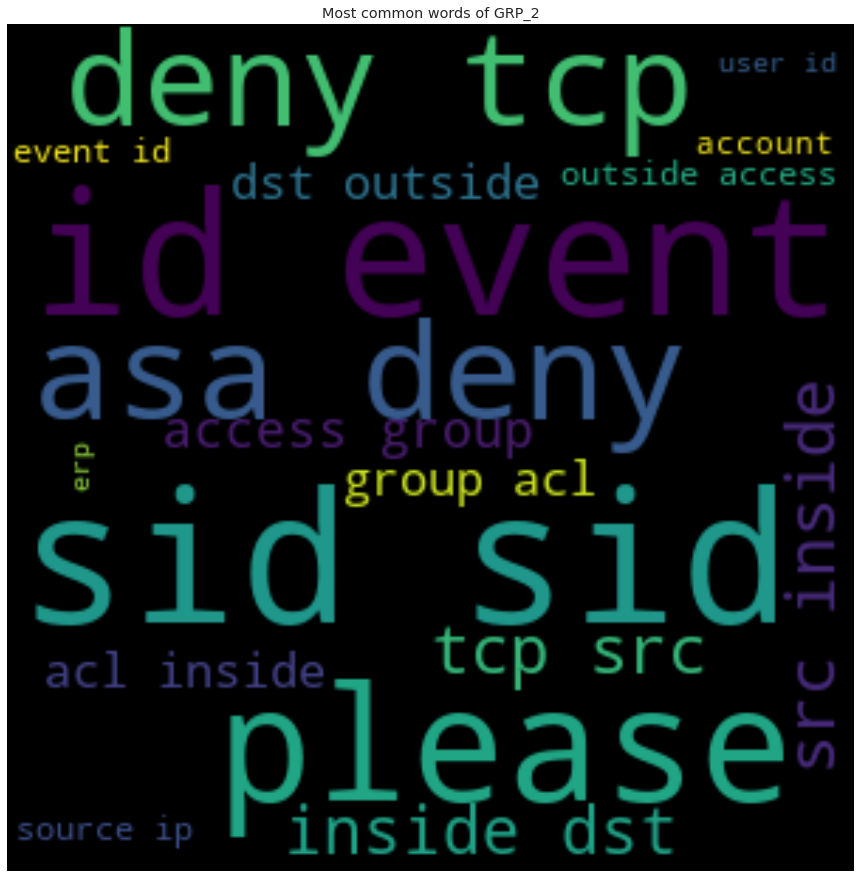

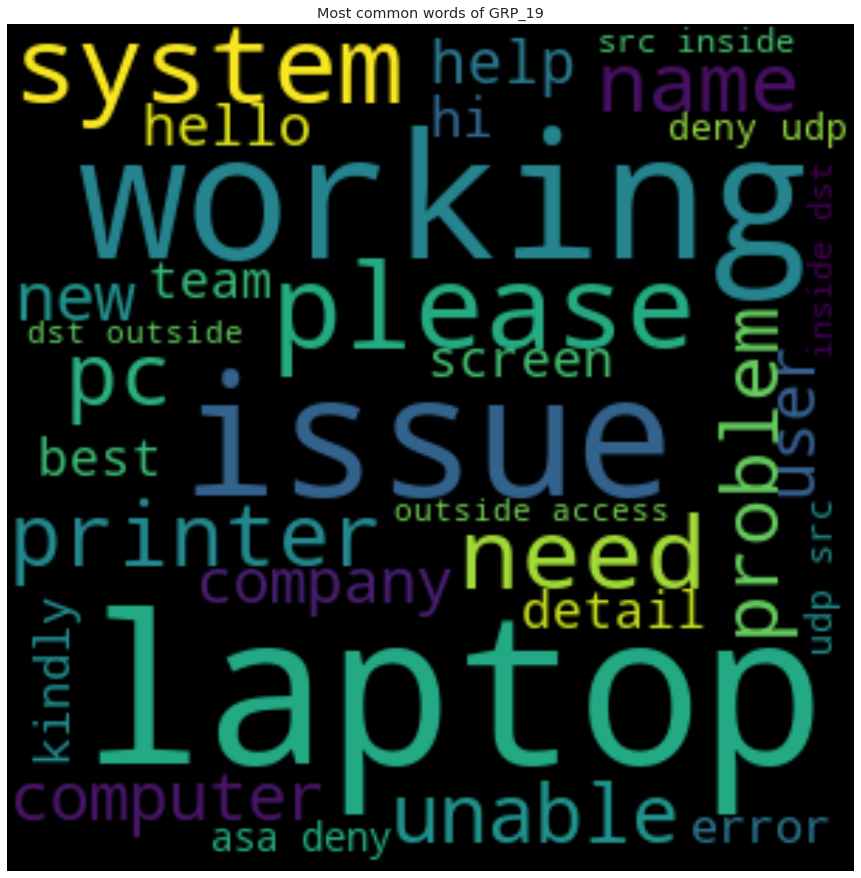

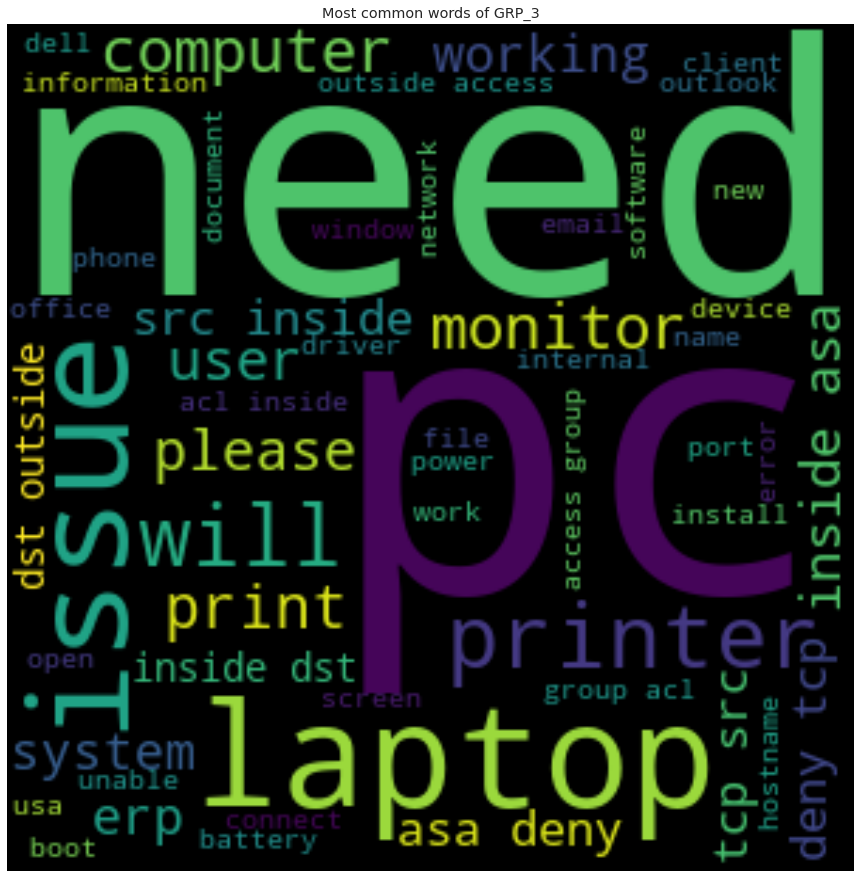

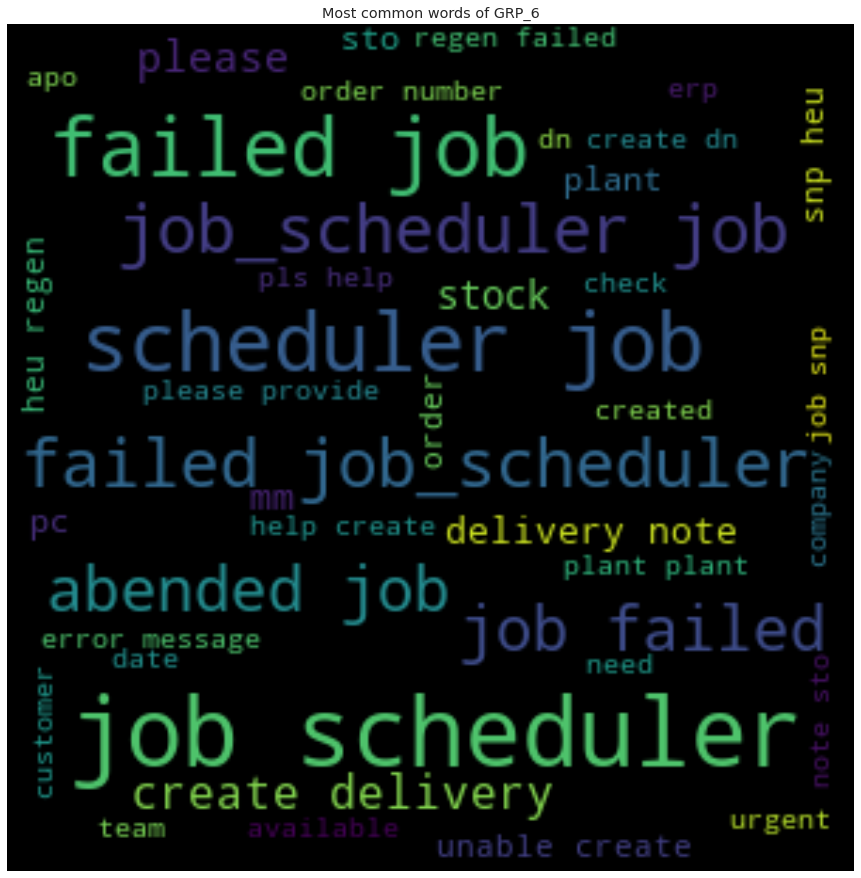

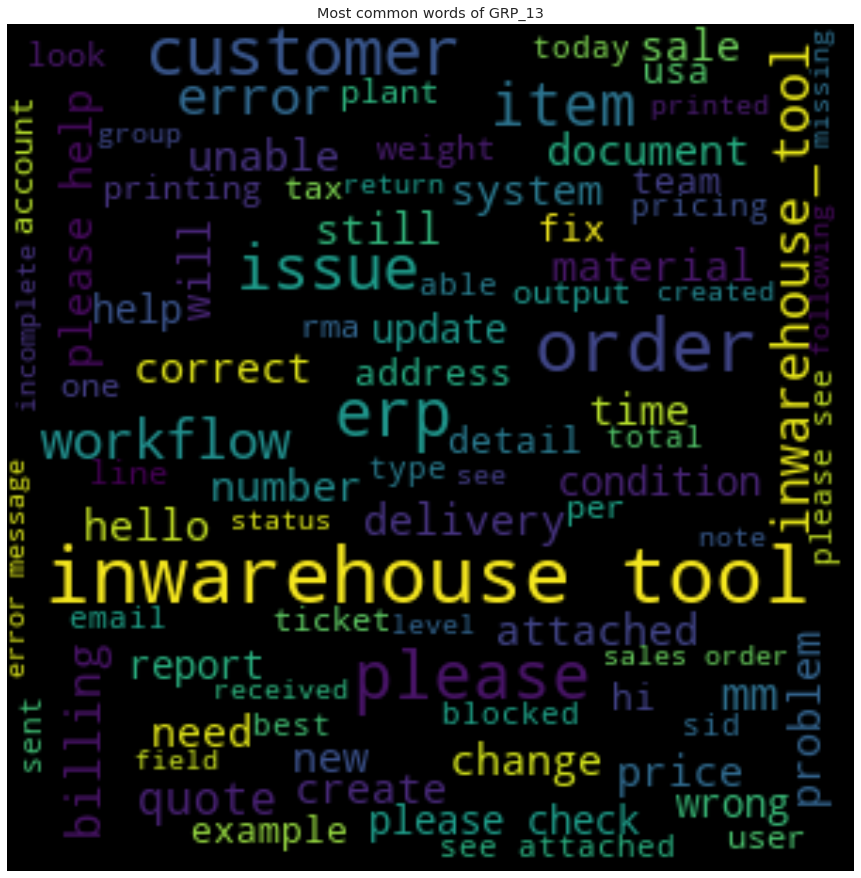

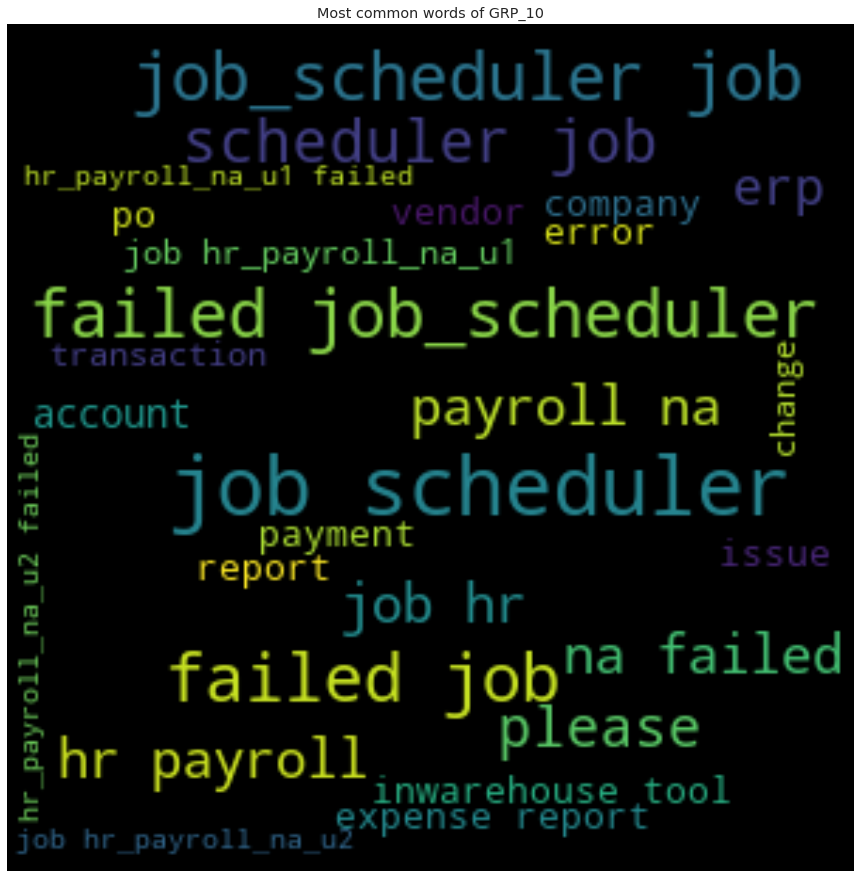

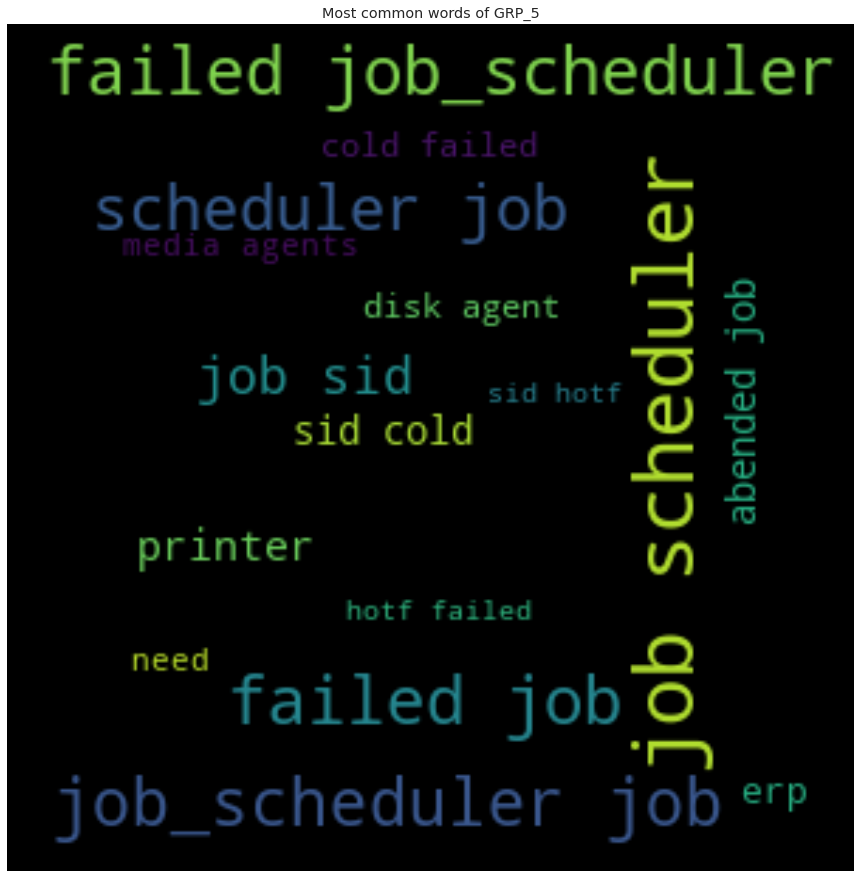

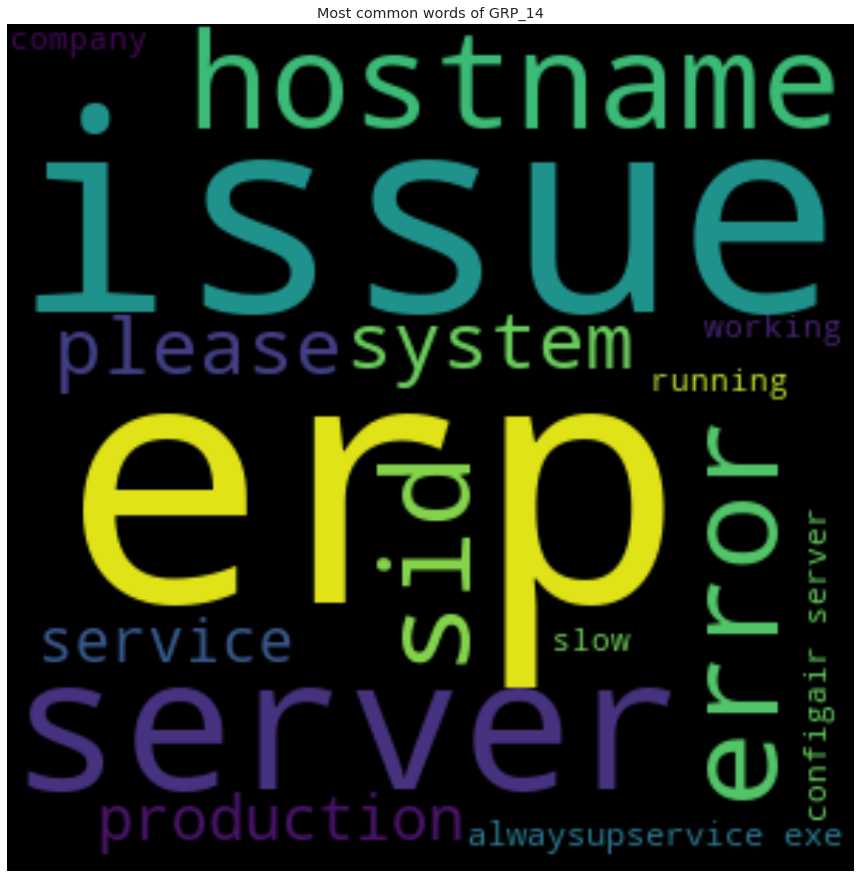

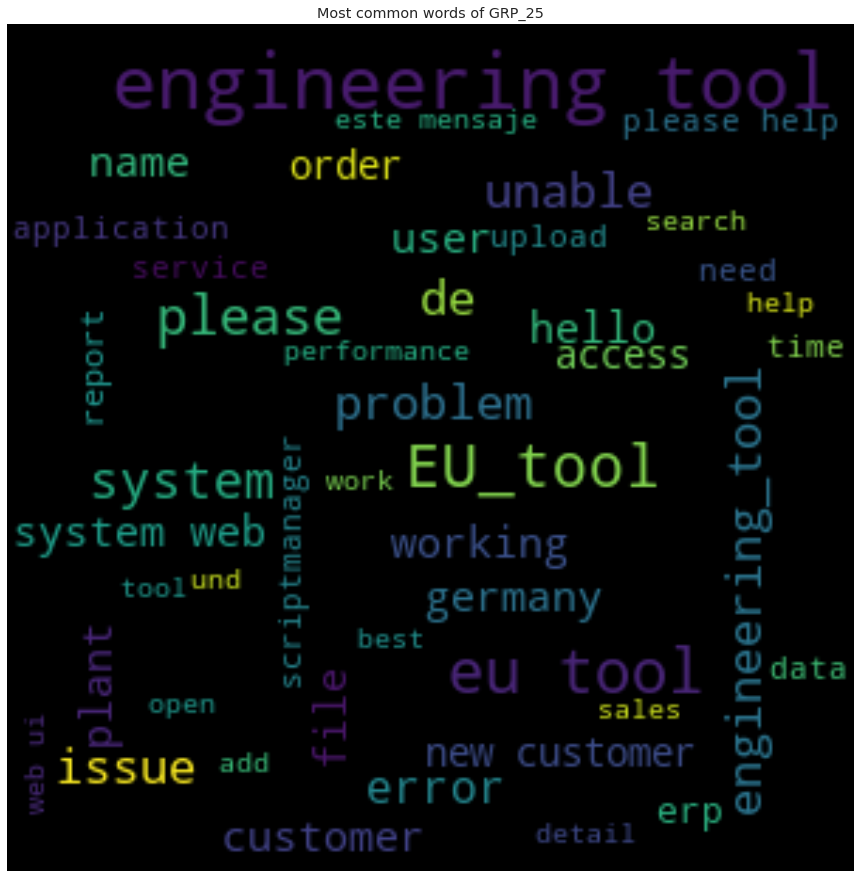

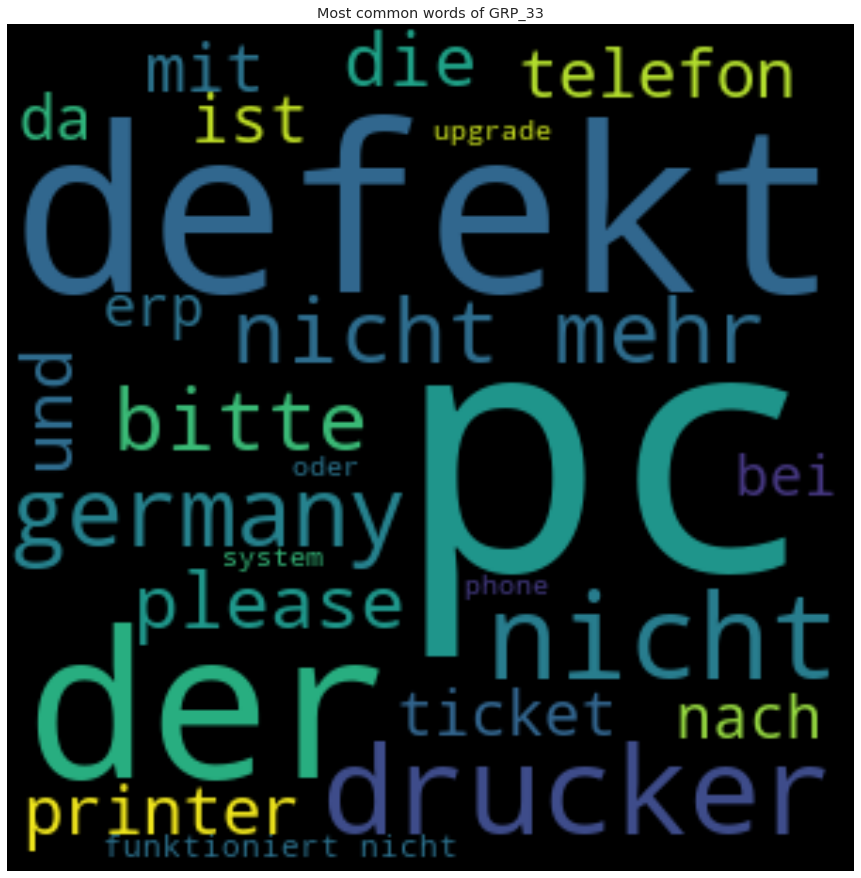

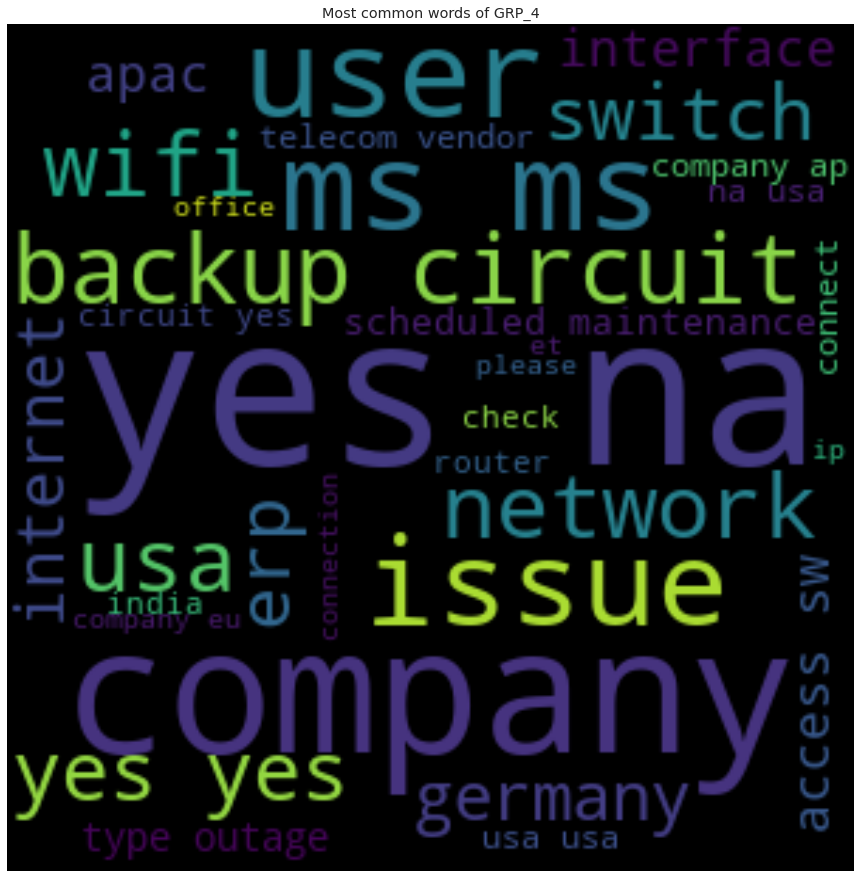

In [ ]:
# Most Common Words for different groups
for i in range(16):
    generate_word_clod(' '.join(AtaData[AtaData['Assignment group'] == value[i]].Description.str.strip()),value[i])

In [ ]:
# Group by Category

groupDf = AtaData.groupby(['Assignment group']).size().reset_index(name='counts')
groupDf

Assignment group  counts
0             GRP_0    3934
1             GRP_1      31
2            GRP_10     140
3            GRP_11      30
4            GRP_12     257
..              ...     ...
69           GRP_71       2
70           GRP_72       2
71           GRP_73       1
72            GRP_8     645
73            GRP_9     252

[74 rows x 2 columns]

In [ ]:
groupDf.describe()

counts
count    74.000000
mean    113.743243
std     460.731077
min       1.000000
25%       5.250000
50%      26.000000
75%      81.000000
max    3934.000000

In [ ]:
AtaData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8417 entries, 0 to 8499
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Description       8417 non-null   object
 1   Assignment group  8417 non-null   object
dtypes: object(2)
memory usage: 197.3+ KB


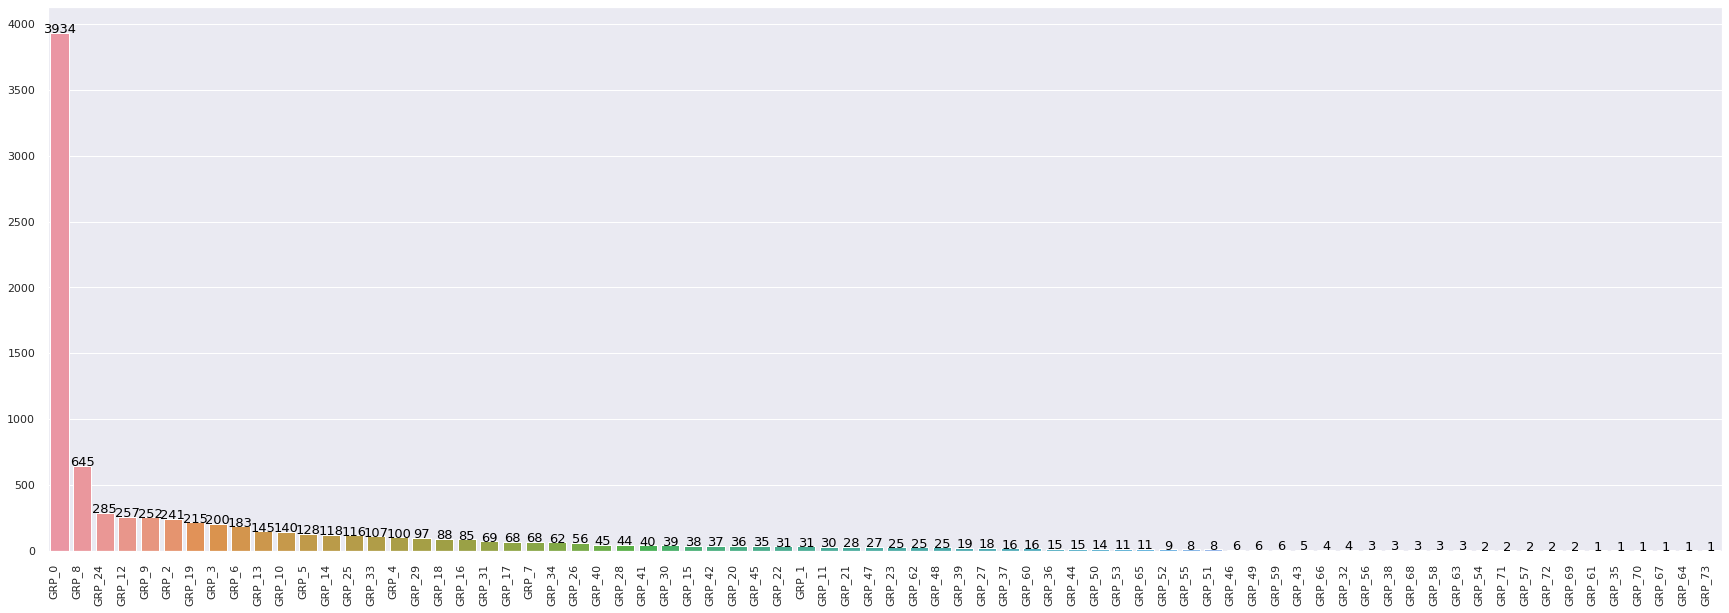

In [ ]:
# Distribution by Group
sns.set_theme();
 
assgn = AtaData['Assignment group'].value_counts()
plt.figure(figsize=(30,10))
 
cntplot = sns.barplot(x=assgn.index,y=assgn.values)
cntplot.set_xticklabels(cntplot.get_xticklabels(), rotation=90, ha="right")
for i in range(len(assgn)):
  cntplot.text(i, assgn.values[i], assgn.values[i], color='black', ha='center', fontsize=13)
plt.show()

In [ ]:
# NLP - STOPWORD Removal, Takenisation, Lemma and Stemmatization

AtaData.columns

Index(['Description', 'Assignment group'], dtype='object')

In [ ]:
# checking for any null values
AtaData.isnull().sum()

Description         0
Assignment group    0
dtype: int64

In [ ]:
# Stop Word removal
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Stop Word removal

import nltk
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
#Remove Stop Words
from nltk.corpus import stopwords
stop = stopwords.words('english')


AtaData['Description'] = AtaData['Description'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
print(AtaData)


                                            Description Assignment group
0     login issue verified user details employee man...            GRP_0
1     outlook hello team meetings skype meetings etc...            GRP_0
2                   cant log vpn hi cannot log vpn best            GRP_0
3     unable access hr_tool page unable access hr to...            GRP_0
4                               skype error skype error            GRP_0
...                                                 ...              ...
8495  emails coming zz mail good afternoon receiving...           GRP_29
8496  telephony_software issue telephony software issue            GRP_0
8497  vip2: windows password reset tifpdchb pedxruyf...            GRP_0
8498  machine nÃ£o estÃ¡ funcionando unable access m...           GRP_62
8499  mehreren pc`s lassen sich verschiedene prgramd...           GRP_49

[8417 rows x 2 columns]


In [ ]:
#Word Tokenisation 

from nltk.tokenize import word_tokenize
nltk.download('punkt')
AtaData['Description'].apply(word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0       [login, issue, verified, user, details, employ...
1       [outlook, hello, team, meetings, skype, meetin...
2          [cant, log, vpn, hi, can, not, log, vpn, best]
3       [unable, access, hr_tool, page, unable, access...
4                            [skype, error, skype, error]
                              ...                        
8495    [emails, coming, zz, mail, good, afternoon, re...
8496    [telephony_software, issue, telephony, softwar...
8497    [vip2, :, windows, password, reset, tifpdchb, ...
8498    [machine, nÃ£o, estÃ¡, funcionando, unable, ac...
8499    [mehreren, pc`s, lassen, sich, verschiedene, p...
Name: Description, Length: 8417, dtype: object

In [ ]:
# Lemmatization

import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
# define a function for lematization

def lemmatize(sentence):
    spacy_doc = nlp(sentence) # Parse the sentence using the loaded 'en' model object `nlp`
    return " ".join([token.lemma_ for token in spacy_doc if token.lemma_ !='-PRON-'])

In [ ]:
# Apply Lemmatization

AtaData['Description'] = AtaData['Description'].apply(lemmatize)

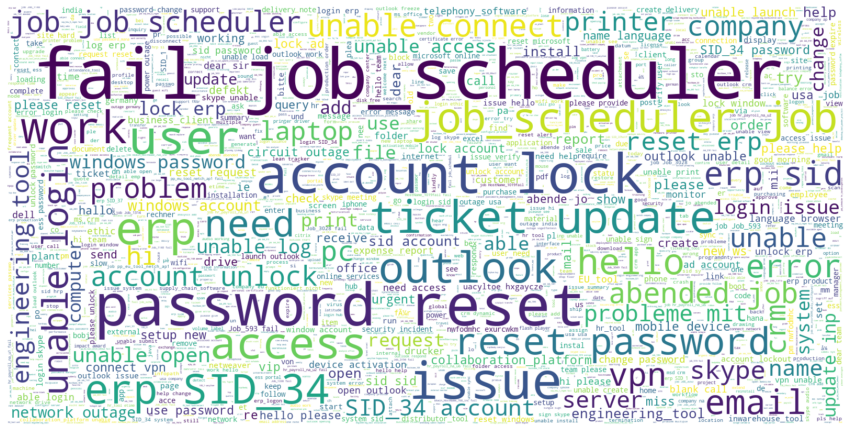

In [ ]:
#Visualize the frequent words after cleaning of the data

text = (AtaData['Description']).to_string(index=False)
wordcloud = WordCloud(background_color='white',max_words = 2000 , width = 1600 , height = 800).generate(text)
#wordcloud = WordCloud(background_color='white',max_words = 2000 , width = 1600 , height = 800)
# plot the WordCloud image                        
plt.figure(figsize = (15, 12), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
from wordcloud import STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
# Extend the English Stop Wordss
STOP_WORDS = STOPWORDS.union({'yes','na','hi', 'etc'
                              'receive','hello',
                              'regards','thanks',
                              'from','greeting',
                              'forward','reply',
                              'will','please',
                              'see','help','able'})

# Generic function to derive top N n-grams from the corpus
def get_top_n_ngrams(corpus, top_n=None, ngram_range=(1,1), stopwords=None):
    vec = CountVectorizer(ngram_range=ngram_range, 
                          stop_words=stopwords).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:top_n]

In [ ]:
# Top Unigrams with stopword removal as for the short description stopword removal was not done, if any will be removed
top_n = 50
ngram_range = (1,1)
uni_grams_sw = get_top_n_ngrams(AtaData.Description, top_n, ngram_range, stopwords=STOP_WORDS)

df = pd.DataFrame(uni_grams_sw, columns = ['Summary' , 'count'])
figure = df.groupby('Summary').sum()['count'].sort_values(ascending=False)
figure.head(10)

Summary
job         3487
password    2291
erp         2077
fail        1746
user        1663
company     1585
reset       1520
issue       1518
unable      1496
access      1452
Name: count, dtype: int64

In [ ]:
# Top Bigrams after removing stop words
top_n = 50
ngram_range = (2,2)
bi_grams_sw = get_top_n_ngrams(AtaData.Description, top_n, ngram_range, stopwords=STOP_WORDS)

df = pd.DataFrame(bi_grams_sw, columns = ['Summary' , 'count'])
figure = df.groupby('Summary').sum()['count'].sort_values(ascending=False)
figure.head(10)

Summary
job scheduler         949
fail job              789
password reset        786
fail job_scheduler    785
00 job                761
job job               617
job fail              472
account lock          459
backup circuit        441
reset password        354
Name: count, dtype: int64

In [ ]:
# Top Trigrams

top_n = 50
ngram_range = (3,3)
tri_grams_sw = get_top_n_ngrams(AtaData.Description, top_n, ngram_range, stopwords=STOP_WORDS)

df = pd.DataFrame(tri_grams_sw, columns = ['Summary' , 'count'])
figure = df.groupby('Summary').sum()['count'].sort_values(ascending=False)
figure.head(10)

Summary
fail job scheduler       789
job fail job             461
job job fail             460
00 job job               450
fail job_scheduler 09    308
fail job_scheduler 10    285
group acl inside         185
src inside dst           185
access group acl         185
fail job_scheduler 08    171
Name: count, dtype: int64

In [ ]:
# Based on the manual analysis of the text,below groups can be assigned directly to where model is not required, so we are dropping the rows wchich contains the below groups
# and will consider only balance groups for model building for better accuracy on ticket assignement

# GRP_35 need access to erp need access to
# GRP_38 delete the charm project fy_13
# GRP_39 space available memotech space consumed
# GRP_43 shop_floor_app production order number
# GRP_46 erp nx9
# GRP_51 product selector credit component monitoring_tool
# GRP_54 logical warehouse reduce stock level
# GRP_55 finance_app how to run the report from finance_app
# GRP_57 failed in job_scheduler i was able to access this before
# GRP_58 job qeue job processor
# GRP_61 internal error: unable to find any processes calibration system
# GRP_64 change in report not an otc report only used by your finance team
# GRP_66 installing cutview update cutview
# GRP_67 complete forecast complete my forecast
# GRP_68 expense report not working expense report will not submit
# GRP_69 repeat outbound connection for 135/tcp expense report will not submit
# GRP_70 repeat outbound connection for 135/tcp create signature
# GRP_71 na production files not received not received the production feed files
# GRP_72 update to anftgup nftgyair account locked
# GRP_73 sso portal on the hub oneteam sso not working


# Changing the column name Assigement group to Group_ID as the function doesnt recognise the Assigment Group of column header due to space
AtaData = AtaData.rename(columns = {'Assignment group': 'Group_ID'}, inplace = False)


print(AtaData) 


                                            Description Group_ID
0     login issue verify user detail employee manage...    GRP_0
1     outlook hello team meeting skype meeting etc a...    GRP_0
2               can not log vpn hi can not log vpn best    GRP_0
3     unable access hr_tool page unable access hr to...    GRP_0
4                               skype error skype error    GRP_0
...                                                 ...      ...
8495  email come zz mail good afternoon receive emai...   GRP_29
8496  telephony_software issue telephony software issue    GRP_0
8497  vip2 : windows password reset tifpdchb pedxruy...    GRP_0
8498  machine nÃ£o estÃ ¡ funcionando unable access ...   GRP_62
8499  mehreren pc`s lassen sich verschiedene prgramd...   GRP_49

[8417 rows x 2 columns]


In [ ]:
#Drop the above mentioned groups as they can be assigned directly by creating rules 

indexNames = AtaData[(AtaData['Group_ID'] == 'GRP_73')].index
indexNames1 = AtaData[(AtaData['Group_ID'] == 'GRP_35')].index 
indexNames2 = AtaData[(AtaData['Group_ID'] == 'GRP_38')].index
indexNames3 = AtaData[(AtaData['Group_ID'] == 'GRP_39')].index  
indexNames4 = AtaData[(AtaData['Group_ID'] == 'GRP_43')].index  
indexNames5 = AtaData[(AtaData['Group_ID'] == 'GRP_46')].index 
indexNames6 = AtaData[(AtaData['Group_ID'] == 'GRP_51')].index  
indexNames7 = AtaData[(AtaData['Group_ID'] == 'GRP_54')].index  
indexNames8 = AtaData[(AtaData['Group_ID'] == 'GRP_55')].index  
indexNames9 = AtaData[(AtaData['Group_ID'] == 'GRP_57')].index 
indexNames10 = AtaData[(AtaData['Group_ID'] == 'GRP_58')].index
indexNames11 = AtaData[(AtaData['Group_ID'] == 'GRP_61')].index 
indexNames12 = AtaData[(AtaData['Group_ID'] == 'GRP_64')].index 
indexNames13 = AtaData[(AtaData['Group_ID'] == 'GRP_66')].index
indexNames14 = AtaData[(AtaData['Group_ID'] == 'GRP_67')].index
indexNames15 = AtaData[(AtaData['Group_ID'] == 'GRP_68')].index 
indexNames16 = AtaData[(AtaData['Group_ID'] == 'GRP_69')].index 
indexNames17 = AtaData[(AtaData['Group_ID'] == 'GRP_70')].index
indexNames18 = AtaData[(AtaData['Group_ID'] == 'GRP_71')].index 
indexNames19 = AtaData[(AtaData['Group_ID'] == 'GRP_72')].index 

In [ ]:
AtaData.drop(indexNames , inplace=True)
AtaData.drop(indexNames1 , inplace=True)
AtaData.drop(indexNames2 , inplace=True)
AtaData.drop(indexNames3 , inplace=True)
AtaData.drop(indexNames4 , inplace=True)
AtaData.drop(indexNames5 , inplace=True)
AtaData.drop(indexNames6 , inplace=True)
AtaData.drop(indexNames7 , inplace=True)
AtaData.drop(indexNames8, inplace=True)
AtaData.drop(indexNames9 , inplace=True)
AtaData.drop(indexNames10 , inplace=True)
AtaData.drop(indexNames11 , inplace=True)
AtaData.drop(indexNames12 , inplace=True)
AtaData.drop(indexNames13 , inplace=True)
AtaData.drop(indexNames14 , inplace=True)
AtaData.drop(indexNames15 , inplace=True)
AtaData.drop(indexNames16 , inplace=True)
AtaData.drop(indexNames17 , inplace=True)
AtaData.drop(indexNames18 , inplace=True)
AtaData.drop(indexNames19 , inplace=True)

In [ ]:
value = AtaData['Group_ID'].value_counts().sort_values(ascending=False).index
value

Index(['GRP_0', 'GRP_8', 'GRP_24', 'GRP_12', 'GRP_9', 'GRP_2', 'GRP_19',
       'GRP_3', 'GRP_6', 'GRP_13', 'GRP_10', 'GRP_5', 'GRP_14', 'GRP_25',
       'GRP_33', 'GRP_4', 'GRP_29', 'GRP_18', 'GRP_16', 'GRP_31', 'GRP_17',
       'GRP_7', 'GRP_34', 'GRP_26', 'GRP_40', 'GRP_28', 'GRP_41', 'GRP_30',
       'GRP_15', 'GRP_42', 'GRP_20', 'GRP_45', 'GRP_1', 'GRP_22', 'GRP_11',
       'GRP_21', 'GRP_47', 'GRP_48', 'GRP_23', 'GRP_62', 'GRP_27', 'GRP_60',
       'GRP_37', 'GRP_36', 'GRP_44', 'GRP_50', 'GRP_53', 'GRP_65', 'GRP_52',
       'GRP_49', 'GRP_59', 'GRP_32', 'GRP_63', 'GRP_56'],
      dtype='object')

In [ ]:
AtaData.describe()

Description Group_ID
count                                       8342     8342
unique                                      7651       54
top     windows account lock window account lock    GRP_0
freq                                          33     3934

In [ ]:
# After assigning the direct tickets to groups we have 54 groups remaining for model building


Ticket = pd.DataFrame(AtaData['Group_ID'].value_counts())
Ticket = Ticket.T
Ticket

# we have groups with less than 100 tickets which will be clubed together

GRP_0  GRP_8  GRP_24  GRP_12  ...  GRP_59  GRP_32  GRP_63  GRP_56
Group_ID   3934    645     285     257  ...       6       4       3       3

[1 rows x 54 columns]

In [ ]:
# Combine groups which have <100 tickets

AtaData['Count'] = AtaData.apply(lambda row: Ticket[row['Group_ID']] , axis=1)
AtaData.loc[AtaData['Count'] <= 100 , "Group_ID"] = "GRP_A"

In [ ]:
Ticket = pd.DataFrame(AtaData['Group_ID'].value_counts())
Ticket = Ticket.T
Ticket

GRP_0  GRP_A  GRP_8  GRP_24  ...  GRP_5  GRP_14  GRP_25  GRP_33
Group_ID   3934   1376    645     285  ...    128     118     116     107

[1 rows x 16 columns]

# Based on the wordcloud above and frequent issues

# 1 . Password reset
# 2. Fail Job & Schedular

most of the tickets like password reset, account lock, login issue etc are assigned to group_0

Most of the tickets can be reduced by developing self help chat bot or ivr or scripts to resove the issues

After combining the short description & description fields a more comrehensive vocabulary is generated. But this caused sentences to have foreign language & english being combined. This became a deterent in language translation.

On checking model accuracy we observed neglible difference when 'Shot Description' was included.


Similar while performing spell check also, it was observed that model accuracy was not improving. Hence decided against doing this considering the huge time taken to perform the task by pyspellchecker.

# Milestone2 - Building the Models

## Below are the models which will be built and validated for the best

*   Multinomial Naive Bayes
*   K Nearest neighbor (KNN)
*   Support Vector Machine
*   Decision Tree
*   Random Forest
* AdaBoost Classifier
* Bagging Classifier
*   LSTM

In [ ]:
from sklearn.svm import SVC, LinearSVC
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.metrics import confusion_matrix, classification_report, auc
from sklearn.metrics import roc_curve, accuracy_score, precision_recall_curve,f1_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import  classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras.layers import GlobalAveragePooling1D, Embedding, LSTM
from tensorflow.keras.models import Model
from keras.regularizers import L1L2
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional,MaxPooling1D ,SpatialDropout1D
from tensorflow.keras.models import Model, Sequential
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn import preprocessing
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.pipeline import Pipeline



In [ ]:
# Create a target column
AtaData['Target'] = AtaData['Group_ID'].astype('category').cat.codes
AtaData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8342 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Description  8342 non-null   object
 1   Group_ID     8342 non-null   object
 2   Count        8342 non-null   int64 
 3   Target       8342 non-null   int8  
dtypes: int64(1), int8(1), object(2)
memory usage: 268.8+ KB


In [ ]:
AtaData.drop(['Count'], axis = 1)

Description Group_ID  Target
0     login issue verify user detail employee manage...    GRP_0       0
1     outlook hello team meeting skype meeting etc a...    GRP_0       0
2               can not log vpn hi can not log vpn best    GRP_0       0
3     unable access hr_tool page unable access hr to...    GRP_0       0
4                               skype error skype error    GRP_0       0
...                                                 ...      ...     ...
8495  email come zz mail good afternoon receive emai...    GRP_A      15
8496  telephony_software issue telephony software issue    GRP_0       0
8497  vip2 : windows password reset tifpdchb pedxruy...    GRP_0       0
8498  machine nÃ£o estÃ ¡ funcionando unable access ...    GRP_A      15
8499  mehreren pc`s lassen sich verschiedene prgramd...    GRP_A      15

[8342 rows x 3 columns]

In [ ]:
cleanData.index.is_unique

True

In [ ]:
cleanData.drop_duplicates(inplace=True)

In [ ]:
# Make a copy of the raw_data dataframe for future use
cleanData = AtaData.copy()

# Create training and test datasets with 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(cleanData.Description, 
                                                    cleanData.Target, 
                                                    test_size=0.20, 
                                                    random_state=42)
print('\033[1mShape of the training set:\033[0m', X_train.shape, X_test.shape)
print('\033[1mShape of the test set:\033[0m', y_train.shape, y_test.shape)

Shape of the training set: (6673,) (1669,)
Shape of the test set: (6673,) (1669,)


In [ ]:
# Develop a method/function to train and test the data

def run_classification(Prediction_model, X_train, X_test, y_train, y_test, arch_name=None, pipelineRequired=True, isDeepModel=False):
    clf = Prediction_model

    if pipelineRequired :
        clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', Prediction_model),
                     ])
      
    if isDeepModel :
        clf.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=10, batch_size=128,verbose=1)
        # predict from the classifier
        y_pred = clf.predict(X_test)
        y_pred = np.argmax(y_pred, axis=1)
        y_train_pred = clf.predict(X_train)
        y_train_pred = np.argmax(y_train_pred, axis=1)
    else :
        clf.fit(X_train, y_train)
        # predict from the classifier
        y_pred = clf.predict(X_test)
        y_train_pred = clf.predict(X_train)
    
    print('Prediction Model:', Prediction_model)
    print('-'*80)
    print('Training accuracy: %.2f%%' % (accuracy_score(y_train,y_train_pred) * 100))
    print('Testing accuracy: %.2f%%' % (accuracy_score(y_test, y_pred) * 100))
    print('-'*80)
    

In [ ]:
# Multinomial Naive Bayes Mode
run_classification(MultinomialNB(), X_train, X_test, y_train, y_test)


Prediction Model: MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
--------------------------------------------------------------------------------
Training accuracy: 62.51%
Testing accuracy: 58.66%
--------------------------------------------------------------------------------


In [ ]:
# KNN - K-Nearest Neighbour
run_classification(KNeighborsClassifier(), X_train, X_test, y_train, y_test)

Prediction Model: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
--------------------------------------------------------------------------------
Training accuracy: 76.67%
Testing accuracy: 67.65%
--------------------------------------------------------------------------------


In [ ]:
# SVM - Support Vectory Machine

run_classification(LinearSVC(), X_train, X_test, y_train, y_test)

Prediction Model: LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
--------------------------------------------------------------------------------
Training accuracy: 96.33%
Testing accuracy: 71.42%
--------------------------------------------------------------------------------


In [ ]:
# Decision Tree

run_classification(DecisionTreeClassifier(), X_train, X_test, y_train, y_test)

Prediction Model: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
--------------------------------------------------------------------------------
Training accuracy: 99.73%
Testing accuracy: 63.15%
--------------------------------------------------------------------------------


In [ ]:
# Random Forrest Classifier

from sklearn.ensemble import RandomForestClassifier
run_classification(RandomForestClassifier(n_estimators=100), X_train, X_test, y_train, y_test)

Prediction Model: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
--------------------------------------------------------------------------------
Training accuracy: 99.73%
Testing accuracy: 68.36%
--------------------------------------------------------------------------------


In [ ]:
#Ada Boost Classifier
from sklearn.ensemble import AdaBoostClassifier
run_classification(AdaBoostClassifier(n_estimators=100), X_train, X_test, y_train, y_test)

Prediction Model: AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=None)
--------------------------------------------------------------------------------
Training accuracy: 51.27%
Testing accuracy: 49.91%
--------------------------------------------------------------------------------


In [ ]:
#Bagging Classfier
from sklearn.ensemble import BaggingClassifier  
run_classification(BaggingClassifier(n_estimators=100), X_train, X_test, y_train, y_test)


Prediction Model: BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=100,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)
--------------------------------------------------------------------------------
Training accuracy: 99.70%
Testing accuracy: 68.72%
--------------------------------------------------------------------------------


In [ ]:
AtaData.head()

Description Group_ID  Count  Target
0  login issue verify user detail employee manage...    GRP_0   3934       0
1  outlook hello team meeting skype meeting etc a...    GRP_0   3934       0
2            can not log vpn hi can not log vpn best    GRP_0   3934       0
3  unable access hr_tool page unable access hr to...    GRP_0   3934       0
4                            skype error skype error    GRP_0   3934       0

In [ ]:
# Saving data in temp file
temp = AtaData

In [ ]:
temp.drop(['Count'],axis='columns',inplace=True)

In [ ]:
temp.drop(['Target'],axis='columns',inplace=True)

In [ ]:
temp['Target'] = temp['Group_ID'].astype('category').cat.codes
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8342 entries, 0 to 8499
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Description  8342 non-null   object
 1   Group_ID     8342 non-null   object
 2   Target       8342 non-null   int8  
dtypes: int8(1), object(2)
memory usage: 523.7+ KB


In [ ]:
#Export the data frame to a .csv file
temp.to_csv (r'/content/drive/MyDrive/Colab Notebooks/CapstoneProjectFinal/temp.csv', index = False, header=True)

In [ ]:
import csv

vocab_size = 5000
embedding_dim = 64
max_length = 200
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_portion = .8


articles = []
labels = []

with open("/content/drive/MyDrive/Colab Notebooks/CapstoneProjectFinal/temp.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        labels.append(row[2])
        article = row[0]
        for word in STOPWORDS:
            token = ' ' + word + ' '
            article = article.replace(token, ' ')
            article = article.replace(' ', ' ')
        articles.append(article)


train_size = int(len(articles) * training_portion)

train_articles = articles[0: train_size]
train_labels = labels[0: train_size]

validation_articles = articles[train_size:]
validation_labels = labels[train_size:]

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_articles)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_articles)

train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

validation_sequences = tokenizer.texts_to_sequences(validation_articles)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
    # Add an Embedding layer expecting input vocab of size 5000, and output embedding dimension of size 64 we set at the top
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
#    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    # use ReLU in place of tanh function since they are very good alternatives of each other.
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    # Add a Dense layer with 6 units and softmax activation.
    # When we have multiple outputs, softmax convert outputs layers into a probability distribution.
    tf.keras.layers.Dense(17, activation='softmax')
])
model.summary()

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          320000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               66048     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 17)                1105      
Total params: 395,409
Trainable params: 395,409
Non-trainable params: 0
_________________________________________________________________


In [ ]:
run_classification(model, train_padded, validation_padded, training_label_seq, validation_label_seq,arch_name=None,pipelineRequired=False, isDeepModel=True)

Epoch 1/10
53/53 [==============================] - 22s 359ms/step - loss: 2.0416 - accuracy: 0.4692 - val_loss: 1.6618 - val_accuracy: 0.4853
Epoch 2/10
53/53 [==============================] - 18s 341ms/step - loss: 1.4546 - accuracy: 0.5873 - val_loss: 1.4091 - val_accuracy: 0.5590
Epoch 3/10
53/53 [==============================] - 18s 340ms/step - loss: 1.2082 - accuracy: 0.6564 - val_loss: 1.3549 - val_accuracy: 0.5770
Epoch 4/10
53/53 [==============================] - 18s 338ms/step - loss: 1.0308 - accuracy: 0.6854 - val_loss: 1.2474 - val_accuracy: 0.6183
Epoch 5/10
53/53 [==============================] - 18s 337ms/step - loss: 0.8824 - accuracy: 0.7253 - val_loss: 1.2856 - val_accuracy: 0.6111
Epoch 6/10
53/53 [==============================] - 18s 339ms/step - loss: 0.7787 - accuracy: 0.7572 - val_loss: 1.3437 - val_accuracy: 0.6171
Epoch 7/10
53/53 [==============================] - 18s 337ms/step - loss: 0.6538 - accuracy: 0.7999 - val_loss: 1.3543 - val_accuracy: 0.6345

# Inferences or Observation
Below are the accuracy results for the built models

*   Multinomial Naive Bayes - Training - 62.51%,  Testing - 58.66%
*   K Nearest neighbor (KNN) - Training - 76.67%,  Testing - 67.65%
*   Support Vector Machine - Training - 96.33%,  Testing - 73.22%
*   Decision Tree - Training - 99.73%,  Testing - 65=3.15%
*   Random Forest - Training - 99.73%,  Testing - 68.36%
*   AdaBoost Classifier - Training - 51.27%,  Testing - 49.91%
*   Bagging Classifier - Training - 99.70%,  Testing - 68.72%
*   LSTM - Training - 89.21%,  Testing - 62.55%


As per the above accuracy from the classifier models, we see that data is overfitting due be below reasons even though the data was cleaned to a certian extent
1) Data is higly imbalance due to skewness in the data which is for Group_0
2) Data contains non english words (Assumption)

In Milestone2 we will be dealing with Imbalanced data and fine tuning the models to make if right fit and classifies the tickets to the right group with certain degree of accuracy